<a href="https://colab.research.google.com/github/matheusmagalhaess/machine-learning/blob/main/Intro_to_ML_and_Classification_Project04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

The database contains informations about a car store.

In [21]:
!pip install graphviz==0.10
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [1]:
import pandas as pd

# Importing the DB
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)

# Handle the data

# Lets change the name of each column to portuguese
a_renomear = {
    "mileage_per_year" : "milhas_por_ano",
    "model_year" : "ano_do_modelo",
    "price" : "preco",
    "sold" : "vendido"
}

# Changing the "yes" to "1" and "no" to "0"
dados = dados.rename(columns=a_renomear)
a_trocar = {
    "no" : 0,
    "yes" : 1
}
dados.vendido = dados.vendido.map(a_trocar)

# Let's see the car's age
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo

# Let's change miles to kilometers
dados['km_por_ano'] = 1.60934 * dados.milhas_por_ano
dados = dados.drop(columns=["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis =1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [2]:
# Labelig the data

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [9]:
# Modeling
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np


SEED = 20 # very important
np.random.seed(SEED)

print("Initializing the trainning...")

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,random_state = SEED, test_size = 0.25,
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos %d elementos" % (len(treino_x), len(teste_x))) 

modelo = LinearSVC(random_state=SEED)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y,previsoes) * 100

print("A taxa de acerto é de: %.2f%%" % taxa_de_acerto)

Initializing the trainning...
Treinaremos com 7500 elementos e testaremos 2500 elementos
A taxa de acerto é de: 58.28%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


It is necessary compare with a baseline, the sklearn has a dummy classifier. You can check the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)



In [10]:
from sklearn.dummy import DummyClassifier

# Creating
dummy_stratified = DummyClassifier()

# Training
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y,previsoes) * 100

print("A taxa de acerto _stratified é de: %.2f%%" % taxa_de_acerto)



A taxa de acerto _stratified é de: 51.92%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [11]:
# Creating
dummy_mostfrequent = DummyClassifier()

# Training
dummy_mostfrequent.fit(treino_x, treino_y)
dummy_mostfrequent.score(teste_x,teste_y)
#taxa_de_acerto = accuracy_score(teste_y,previsoes) * 100
#print("A taxa de acerto dummy_mostfrequent é de: %.2f%%" % taxa_de_acerto)

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.5064

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


# Using deecision tree

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


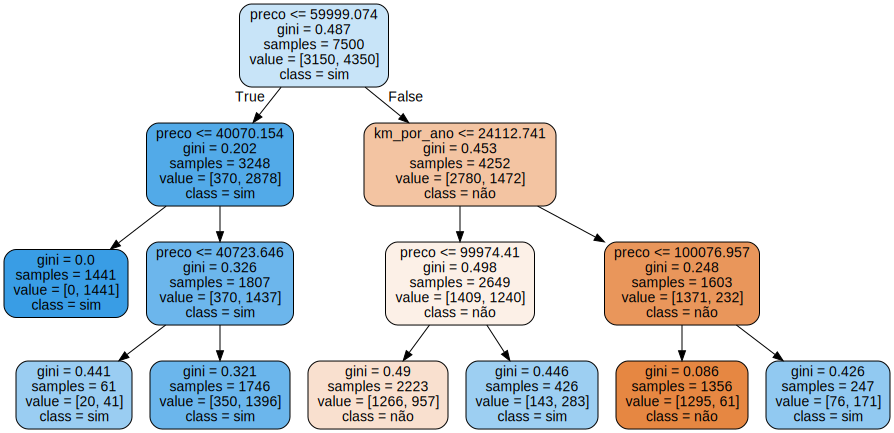

In [29]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(modelo, out_file=None, filled=True, 
                           rounded=True, feature_names=x.columns,
                           class_names = ["não", "sim"] )
grafico = graphviz.Source(dot_data)
grafico

Os algoritmos do tipo árvore de decisão possuem diversos parâmetros, como o critério para separar os nós da árvore, o mínimo de samples para separar um nó ou definir um nó final, assim como a profundidade.

Sabendo disso, também podemos tentar encontrar um conjunto de parâmetros que otimize nosso classificador - uma questão mais aprofundada em machine learning e que abordaremos mais tarde na carreira.

Por enquanto, nosso trabalho é simplesmente carregaros dados, manipulá-los, treinar modelos e verificar, com base em treino e teste, quão bom esse modelo é.

Como exemplo, temos essa árvore de profundidade 3, com resultados muito bons para nossos objetivos (principalmente em comparação com a baseline).

Você pode explorar muitos outros classificadores na documentação do Sklearn, estudar cada um deles e tentar aplicá-los em seu projeto.